In [24]:
# Importing all needed libraries and functions
import joblib
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import sys
sys.path.append('../src')
from functions import data_clean, plot_model_results_final, OverfittingAnalyzer, evaluate_microbiome_models_test

## Task 3: BMI prediction using regression models and metagenomic data

### Importing data and training the regression models

In [5]:
data_dev = data_clean('../data/assignment1_dev_set.csv')
data_val = data_clean('../data/assignment1_val_set.csv')


No NA values found.

No NA values found.


### Run baseline models with no hypeparameter tuning

In [8]:
results_base, feature_importances_base, s_base, best_base_model = evaluate_microbiome_models_test(data_dev, data_val, skip_tuning=True)

Models will be saved to: /home/sotiriosd33/Desktop/Machine learning in computational biology/Assgnment_1/Assignment-1/models

=== Evaluating ElasticNet ===
Saved ElasticNet model to ../models/ElasticNet_20250409_232628.joblib

=== Evaluating BayesianRidge ===
Saved BayesianRidge model to ../models/BayesianRidge_20250409_232632.joblib

=== Evaluating SVM ===
Saved SVM model to ../models/SVM_20250409_232643.joblib

*** Best model is SVM with R2 score 0.125 ***
Saved winner model to ../models/winner_SVM_20250409_232643.joblib


In [9]:
feature_importances_base

,Model,feature,importance
0,ElasticNet,Clostridium symbiosum,0.633231
1,ElasticNet,Host age,0.248991
2,ElasticNet,Ruminococcus champanellensis,0.228197
3,ElasticNet,Parabacteroides johnsonii,0.220724
4,ElasticNet,Eubacterium dolichum,0.219825
...,...,...,...
265,BayesianRidge,Prevotella ruminicola,0.018773
266,BayesianRidge,Lactococcus lactis,0.018227
267,BayesianRidge,Holdemania filiformis,0.017921
268,BayesianRidge,Clostridium sphenoides,0.017271


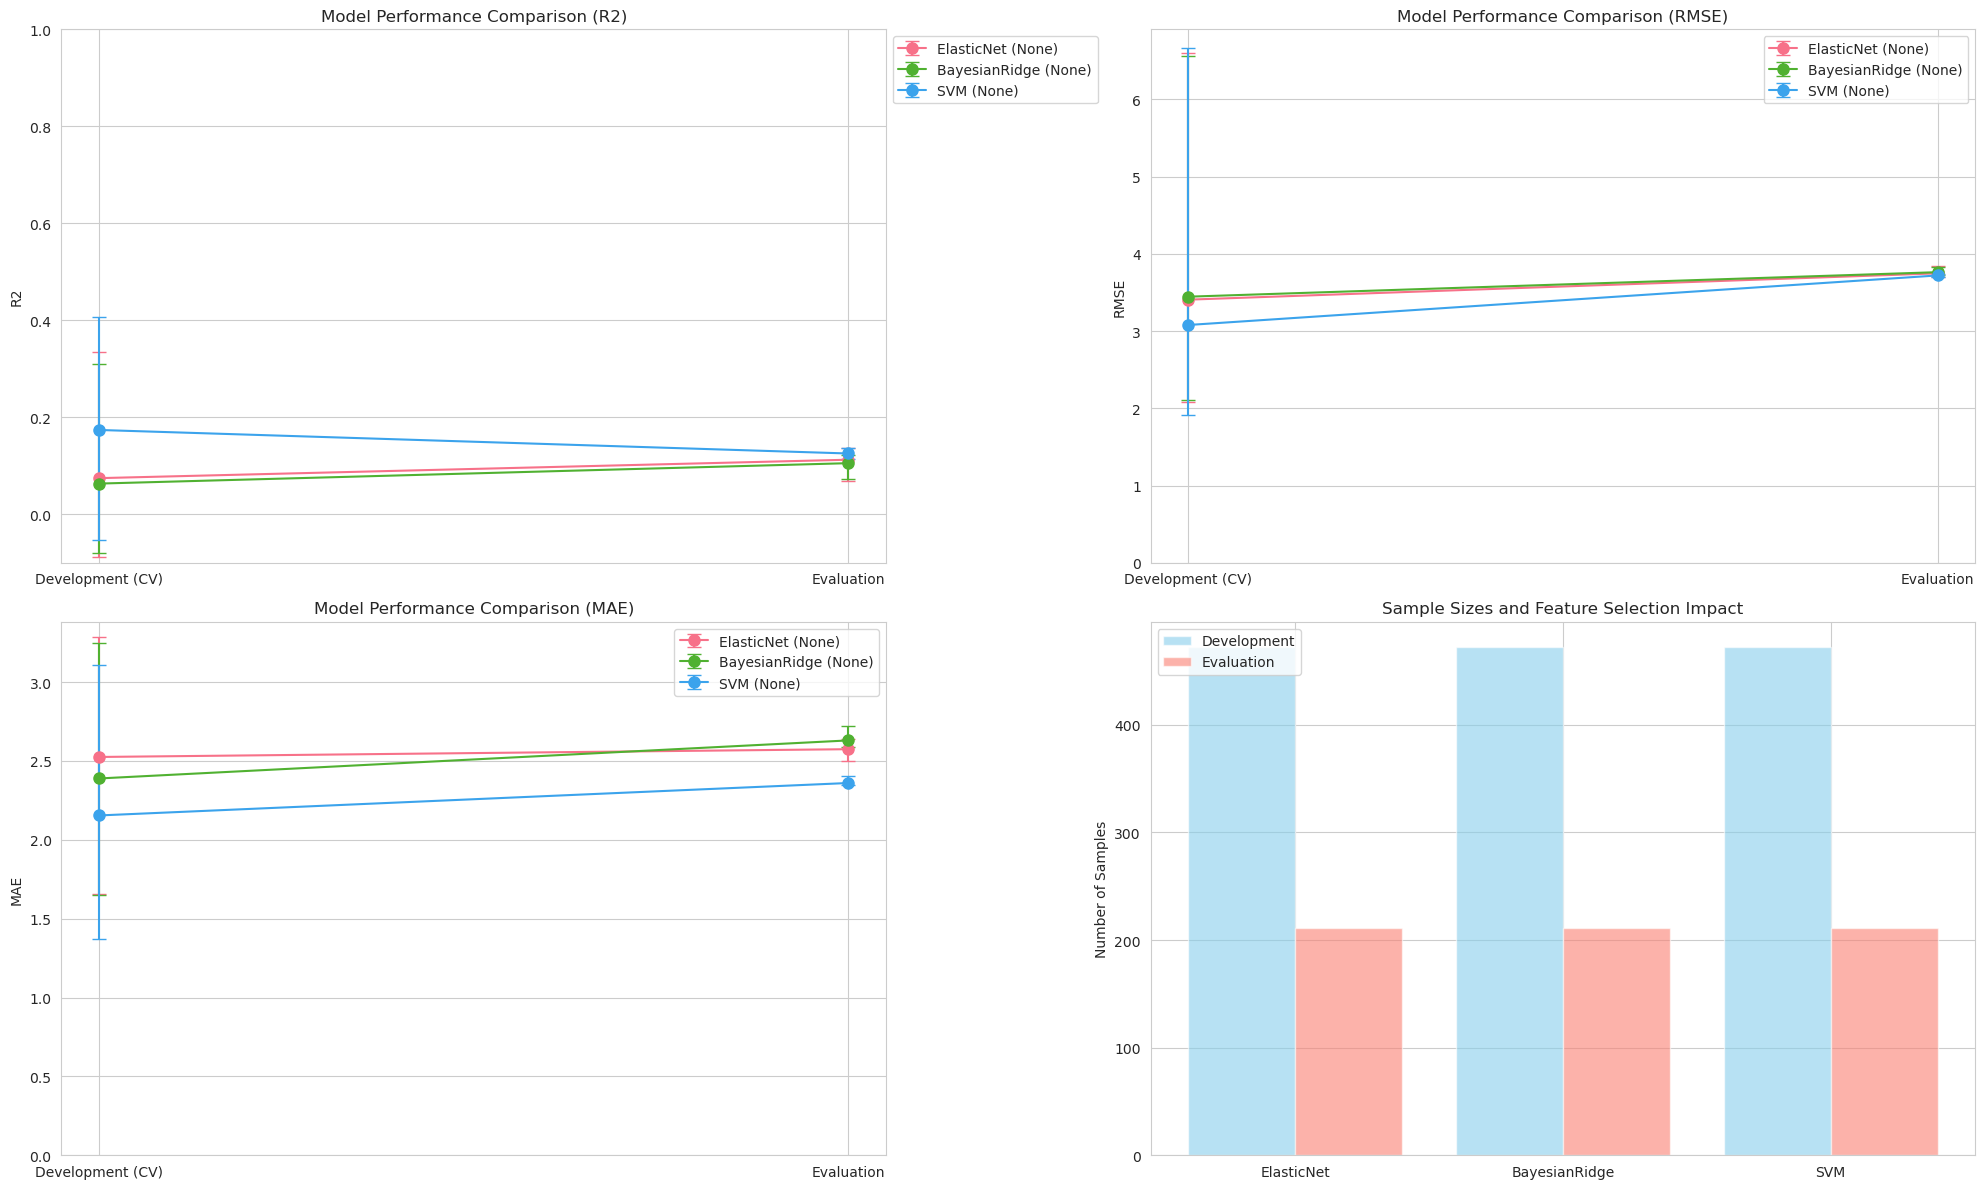


=== Detailed Performance Metrics ===

R2 Scores (median with 95% CI):


,Model,Feature_Selection,Dev_R2,Eval_R2
0,ElasticNet,None,0.075 (-0.087-0.334),0.113 (0.069-0.136)
1,BayesianRidge,None,0.063 (-0.080-0.311),0.105 (0.072-0.123)
2,SVM,None,0.174 (-0.052-0.406),0.125 (0.115-0.136)



RMSE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_RMSE,Eval_RMSE
0,ElasticNet,None,3.406 (2.077-6.606),3.747 (3.697-3.837)
1,BayesianRidge,None,3.445 (2.110-6.567),3.762 (3.726-3.832)
2,SVM,None,3.078 (1.907-6.668),3.720 (3.697-3.743)



MAE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_MAE,Eval_MAE
0,ElasticNet,None,2.526 (1.658-3.287),2.575 (2.498-2.640)
1,BayesianRidge,None,2.389 (1.649-3.248),2.631 (2.590-2.722)
2,SVM,None,2.155 (1.370-3.109),2.361 (2.346-2.404)


In [10]:
plot_model_results_final(results_base)

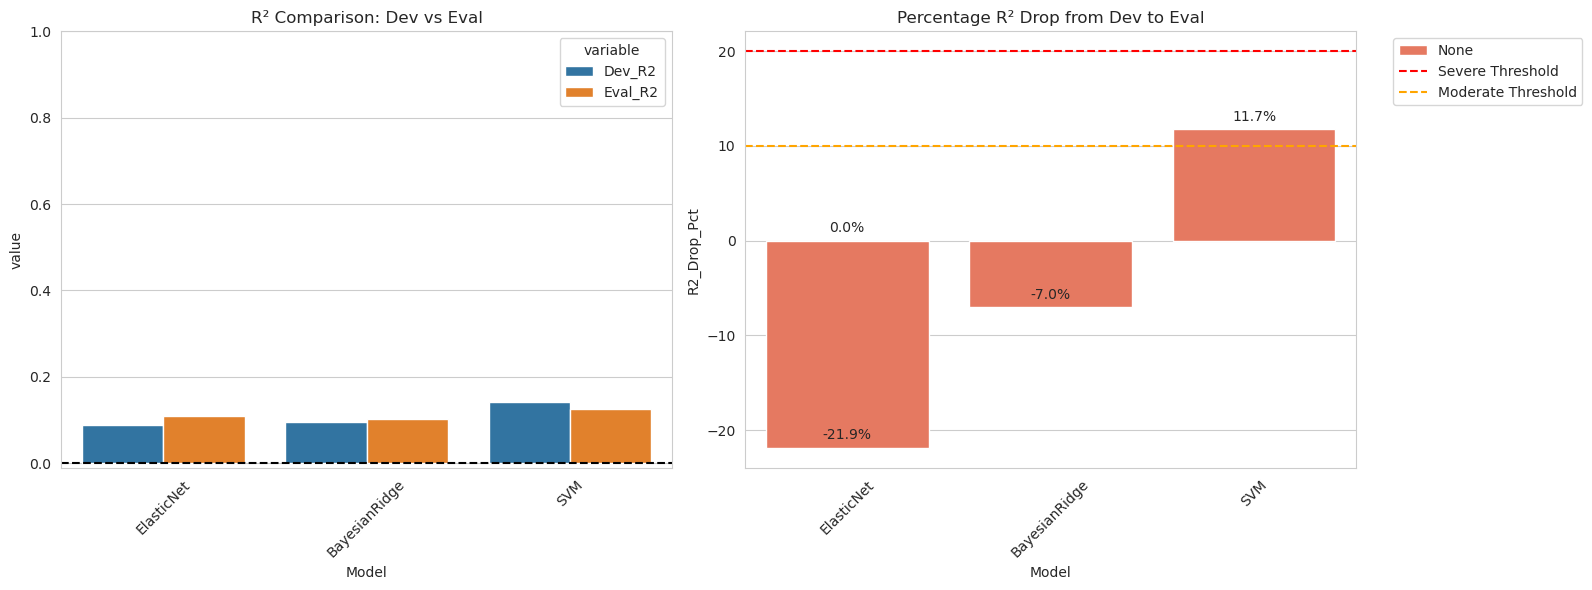

Overfitting status: none
Failed checks: []


,Model,Feature_Selection,Dev_R2,Eval_R2,R2_Drop_Pct,Dev_RMSE,Eval_RMSE,RMSE_Increase_Pct,Dev_Eval_Ratio,Overfitting_Risk
0,ElasticNet,None,0.089023,0.108503,-21.882646,3.778517,3.755494,-0.609289,0.820461,Low
1,BayesianRidge,None,0.096253,0.103023,-7.034125,3.760026,3.767184,0.190390,0.934281,Low
2,SVM,None,0.141178,0.124594,11.746738,3.690761,3.721723,0.838919,1.133103,Medium


In [11]:
# Initialize analyzer with threshold
analyzer = OverfittingAnalyzer(threshold=0.2)

# Perform complete analysis with visualization
results = analyzer.analyze(results_base, plot=True)

# Access analysis components
print("Overfitting status:", results['overfitting_status'])
print("Failed checks:", results['failed_checks'])
display(results['metrics'].style.background_gradient(
    subset=['R2_Drop_Pct', 'RMSE_Increase_Pct'], 
    cmap='Reds'
))

### Run baseline models with feature selection and no hypeparameter tuning

In [30]:
results_fs1, feature_importances_fs1, s_fs1, best_fs1 = evaluate_microbiome_models_test(data_dev, data_val, feature_selection_method='RFE', skip_tuning=True, n_features=100, save_models=False)


=== Evaluating ElasticNet ===

=== Evaluating BayesianRidge ===

=== Evaluating SVM ===


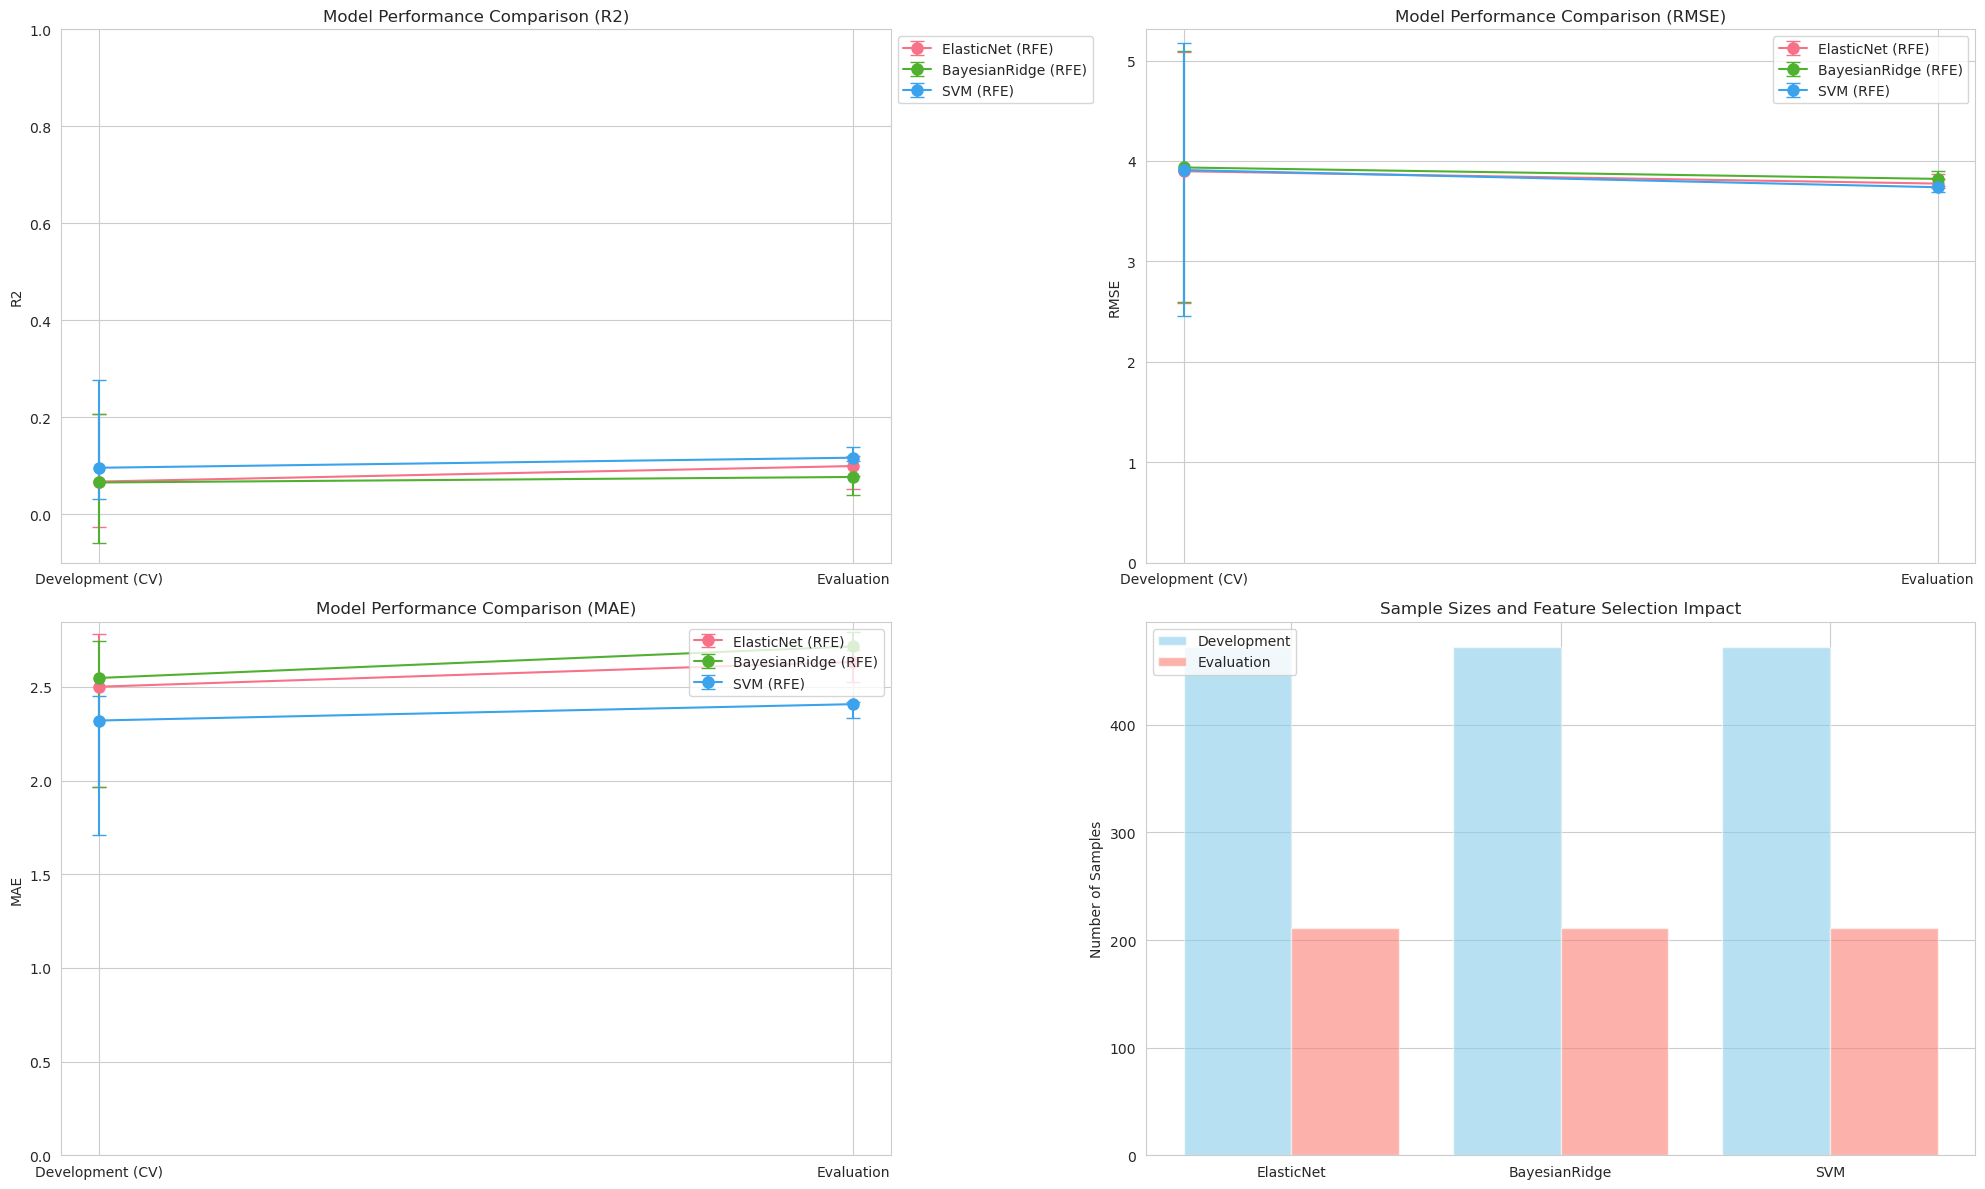


=== Detailed Performance Metrics ===

R2 Scores (median with 95% CI):


,Model,Feature_Selection,Dev_R2,Eval_R2
0,ElasticNet,RFE,0.067 (-0.025-0.208),0.099 (0.053-0.121)
1,BayesianRidge,RFE,0.066 (-0.059-0.207),0.077 (0.039-0.080)
2,SVM,RFE,0.096 (0.032-0.277),0.117 (0.110-0.138)



RMSE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_RMSE,Eval_RMSE
0,ElasticNet,RFE,3.898 (2.591-5.084),3.775 (3.730-3.871)
1,BayesianRidge,RFE,3.935 (2.596-5.092),3.822 (3.816-3.899)
2,SVM,RFE,3.910 (2.455-5.174),3.739 (3.692-3.752)



MAE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_MAE,Eval_MAE
0,ElasticNet,RFE,2.501 (1.966-2.783),2.633 (2.526-2.699)
1,BayesianRidge,RFE,2.548 (1.965-2.744),2.716 (2.613-2.793)
2,SVM,RFE,2.321 (1.709-2.452),2.408 (2.332-2.417)


In [31]:
plot_model_results_final(results_fs1)

In [32]:
results_fs2, feature_importances_fs2, s_fs2, best_fs2 = evaluate_microbiome_models_test(data_dev, data_val, feature_selection_method='variance', skip_tuning=False, save_models=False, use_optuna=True)


=== Evaluating ElasticNet ===
Using Optuna for hyperparameter optimization...
Optimizing model - 50 trials... Best neg_root_mean_squared_error: -3.8416
Using Optuna for hyperparameter optimization...
Optimizing model - 50 trials... Best neg_root_mean_squared_error: -3.6873
Using Optuna for hyperparameter optimization...
Optimizing model - 50 trials... Best neg_root_mean_squared_error: -3.8756
Using Optuna for hyperparameter optimization...
Optimizing model - 50 trials... Best neg_root_mean_squared_error: -3.5760
Using Optuna for hyperparameter optimization...
Optimizing model - 50 trials... Best neg_root_mean_squared_error: -4.1830

=== Evaluating BayesianRidge ===
Using Optuna for hyperparameter optimization...
Optimizing model - 50 trials... Best neg_root_mean_squared_error: -3.8399
Using Optuna for hyperparameter optimization...
Optimizing model - 50 trials... Best neg_root_mean_squared_error: -3.7399
Using Optuna for hyperparameter optimization...
Optimizing model - 50 trials... B

In [42]:
feature_importances_fs2

,Model,feature,importance
0,ElasticNet,Clostridium symbiosum,0.355362
1,ElasticNet,Ruminococcus champanellensis,0.181140
2,ElasticNet,Desulfovibrio fairfieldensis,0.179622
3,ElasticNet,Odoribacter splanchnicus,0.179275
4,ElasticNet,Eubacterium dolichum,0.176055
...,...,...,...
400,SVM,Streptococcus mitis,NaN
401,SVM,Streptococcus oralis,NaN
402,SVM,Sutterella parvirubra,NaN
403,SVM,Thermobaculum terrenum,NaN


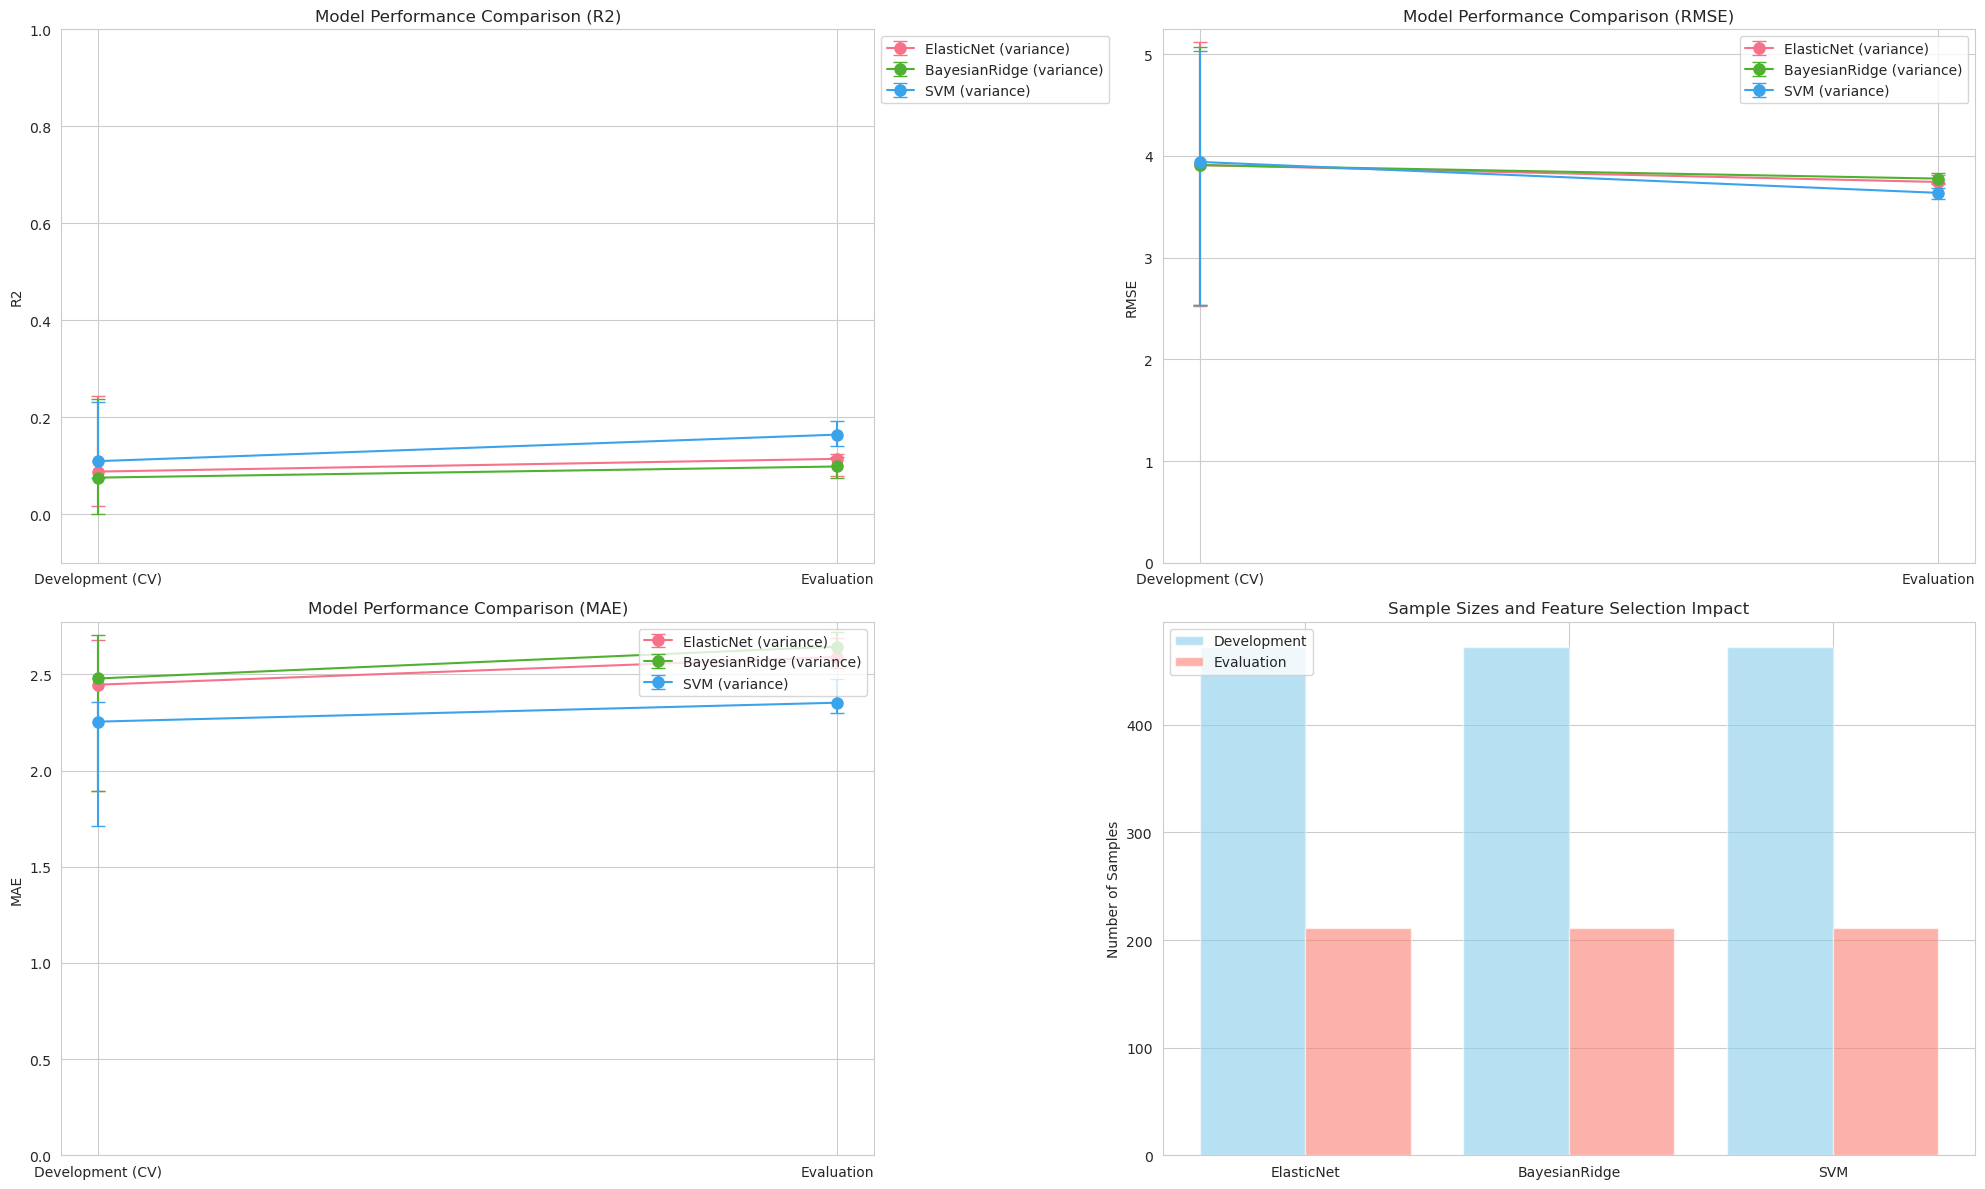


=== Detailed Performance Metrics ===

R2 Scores (median with 95% CI):


,Model,Feature_Selection,Dev_R2,Eval_R2
0,ElasticNet,variance,0.088 (0.016-0.243),0.114 (0.079-0.124)
1,BayesianRidge,variance,0.076 (0.001-0.238),0.099 (0.074-0.119)
2,SVM,variance,0.110 (0.074-0.231),0.164 (0.141-0.192)



RMSE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_RMSE,Eval_RMSE
0,ElasticNet,variance,3.910 (2.527-5.115),3.744 (3.723-3.817)
1,BayesianRidge,variance,3.910 (2.536-5.072),3.777 (3.734-3.828)
2,SVM,variance,3.941 (2.533-5.028),3.636 (3.575-3.688)



MAE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_MAE,Eval_MAE
0,ElasticNet,variance,2.446 (1.896-2.681),2.590 (2.533-2.691)
1,BayesianRidge,variance,2.479 (1.894-2.703),2.644 (2.575-2.722)
2,SVM,variance,2.254 (1.713-2.357),2.353 (2.301-2.475)


In [33]:
plot_model_results_final(results_fs2)

In [28]:
results_fs3, feature_importances_fs3, s_fs3, best_fs3 = evaluate_microbiome_models_test(data_dev, data_val, feature_selection_method='select_from_model', skip_tuning=True, n_features=35, save_models=False)


=== Evaluating ElasticNet ===

=== Evaluating BayesianRidge ===

=== Evaluating SVM ===


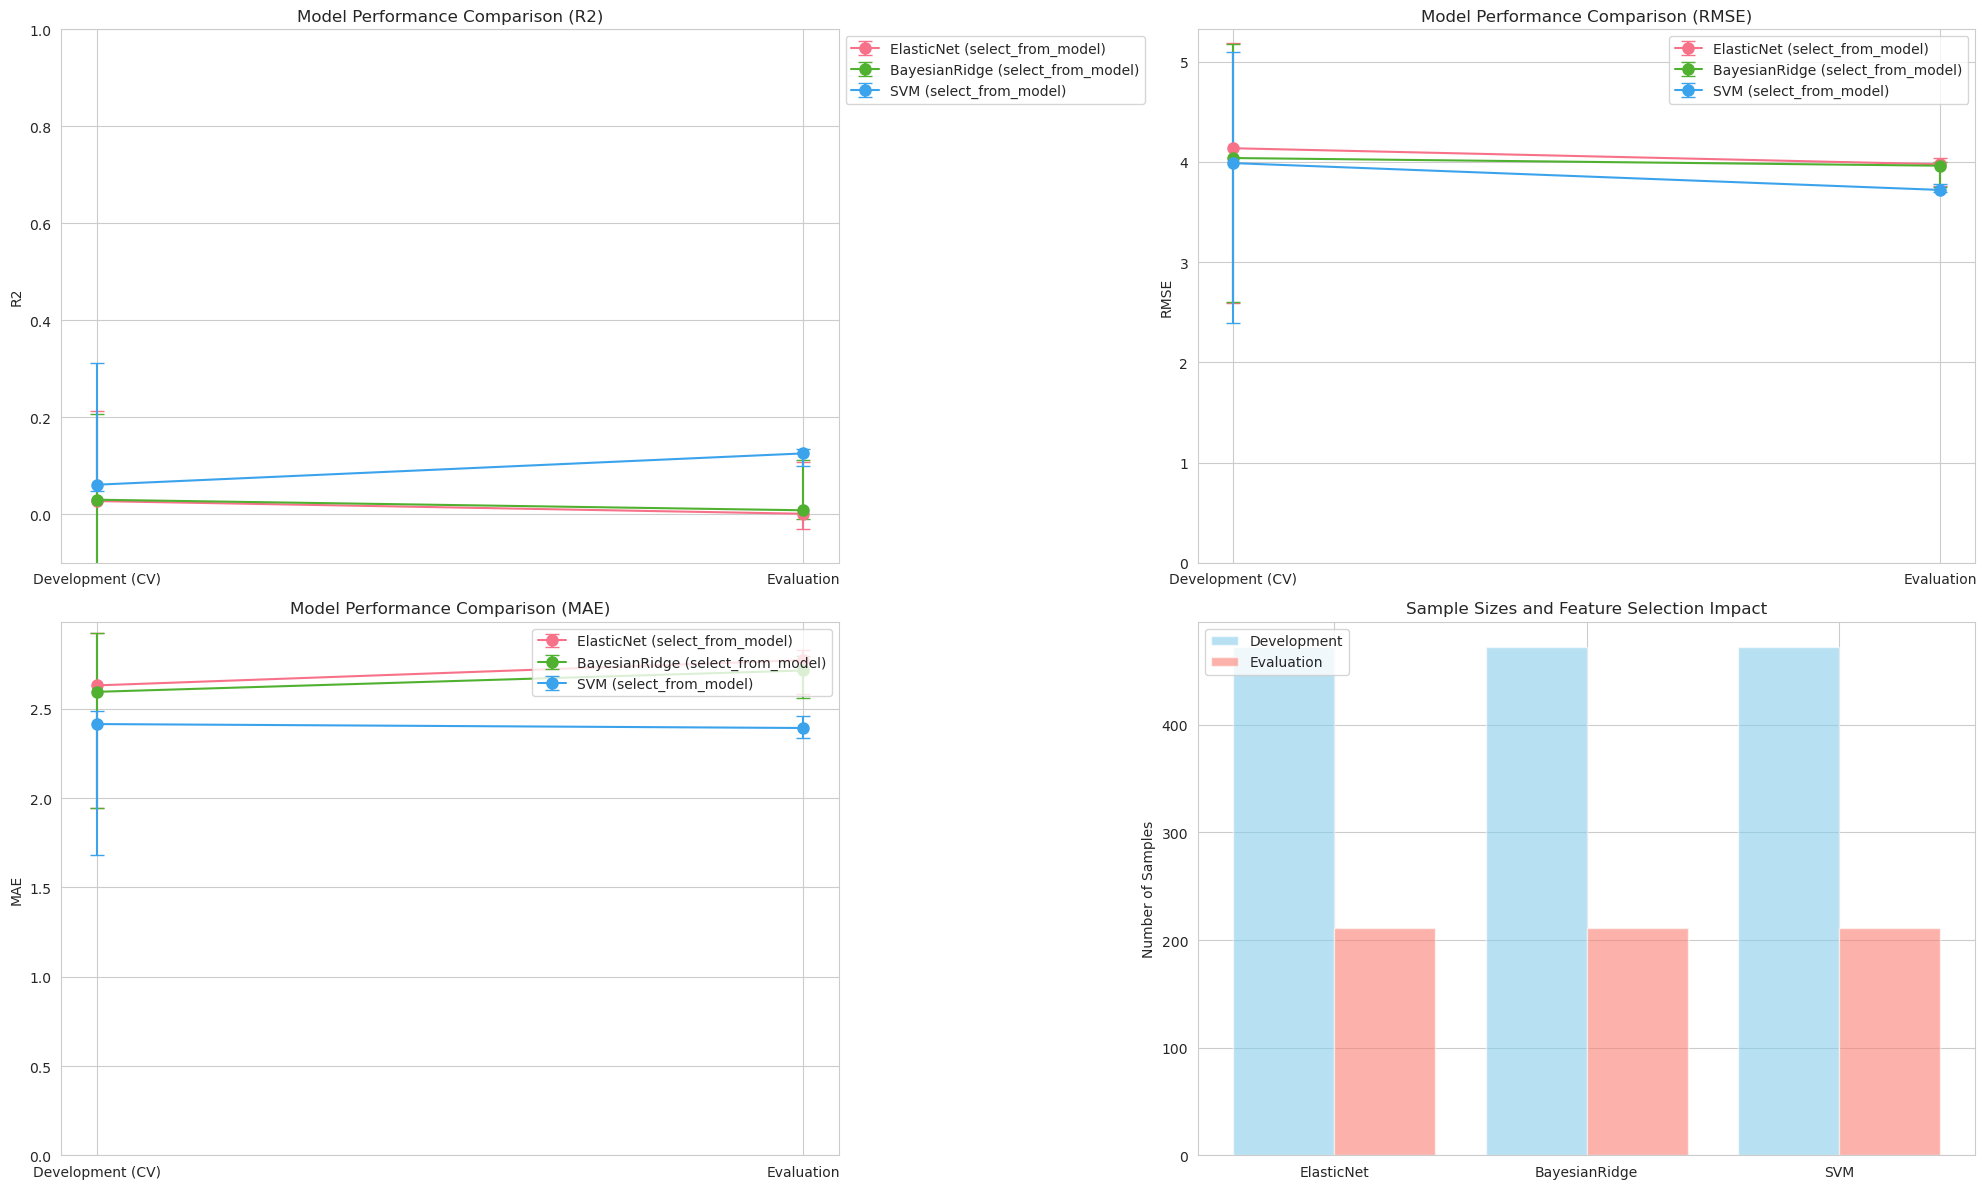


=== Detailed Performance Metrics ===

R2 Scores (median with 95% CI):


,Model,Feature_Selection,Dev_R2,Eval_R2
0,ElasticNet,select_from_model,0.027 (-0.118-0.213),0.001 (-0.030-0.107)
1,BayesianRidge,select_from_model,0.030 (-0.118-0.207),0.008 (-0.010-0.112)
2,SVM,select_from_model,0.061 (0.048-0.312),0.126 (0.099-0.135)



RMSE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_RMSE,Eval_RMSE
0,ElasticNet,select_from_model,4.136 (2.591-5.182),3.976 (3.759-4.037)
1,BayesianRidge,select_from_model,4.038 (2.604-5.172),3.961 (3.749-3.998)
2,SVM,select_from_model,3.987 (2.394-5.098),3.720 (3.700-3.776)



MAE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_MAE,Eval_MAE
0,ElasticNet,select_from_model,2.632 (1.943-2.925),2.774 (2.586-2.831)
1,BayesianRidge,select_from_model,2.596 (1.944-2.926),2.716 (2.559-2.796)
2,SVM,select_from_model,2.416 (1.680-2.486),2.394 (2.335-2.463)


In [29]:
plot_model_results_final(results_fs3)

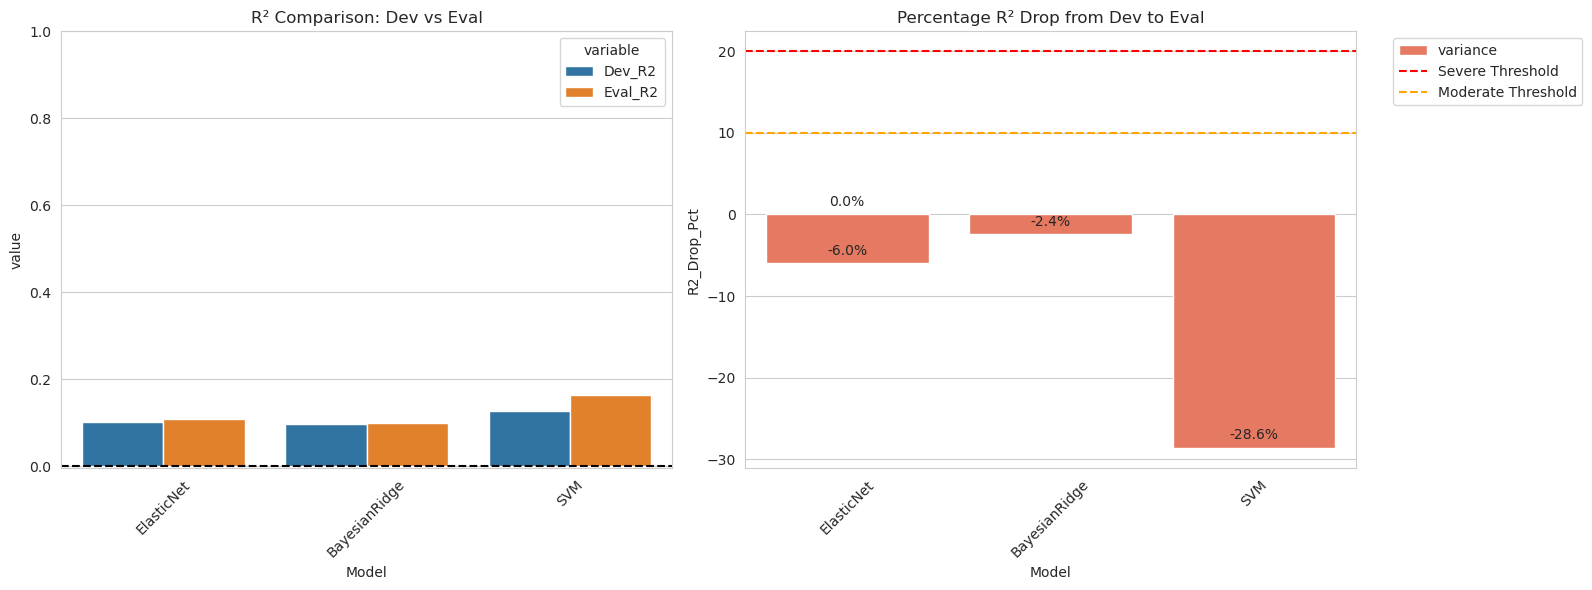

Overfitting status: none
Failed checks: []


,Model,Feature_Selection,Dev_R2,Eval_R2,R2_Drop_Pct,Dev_RMSE,Eval_RMSE,RMSE_Increase_Pct,Dev_Eval_Ratio,Overfitting_Risk
0,ElasticNet,variance,0.101994,0.108085,-5.972116,3.881339,3.756499,-3.216403,0.943644,Low
1,BayesianRidge,variance,0.096225,0.098551,-2.416335,3.890644,3.776558,-2.932310,0.976407,Low
2,SVM,variance,0.127871,0.164453,-28.608478,3.823208,3.635813,-4.901510,0.777554,Low


In [34]:
# Initialize analyzer with threshold
analyzer = OverfittingAnalyzer(threshold=0.2)

# Perform complete analysis with visualization
results = analyzer.analyze(results_fs2, plot=True)

# Access analysis components
print("Overfitting status:", results['overfitting_status'])
print("Failed checks:", results['failed_checks'])
display(results['metrics'].style.background_gradient(
    subset=['R2_Drop_Pct', 'RMSE_Increase_Pct'], 
    cmap='Reds'
))

### Run models with feature selection method "variance threshold" and gridsearchcv hypeparameter tuning

In [40]:
results_tuned, feature_importances_tuned, s_tuned, best_tunred_model = evaluate_microbiome_models_test(data_dev, data_val, feature_selection_method='variance')

Models will be saved to: /home/sotiriosd33/Desktop/Machine learning in computational biology/Assgnment_1/Assignment-1/models

=== Evaluating ElasticNet ===
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Saved ElasticNet model to ../models/ElasticNet_20250410_094011.joblib

=== Evaluating BayesianRidge ===
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Saved BayesianRidge model to ../models/BayesianRidge_20250410_094016.joblib

=== Evaluating SVM ===
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimiza

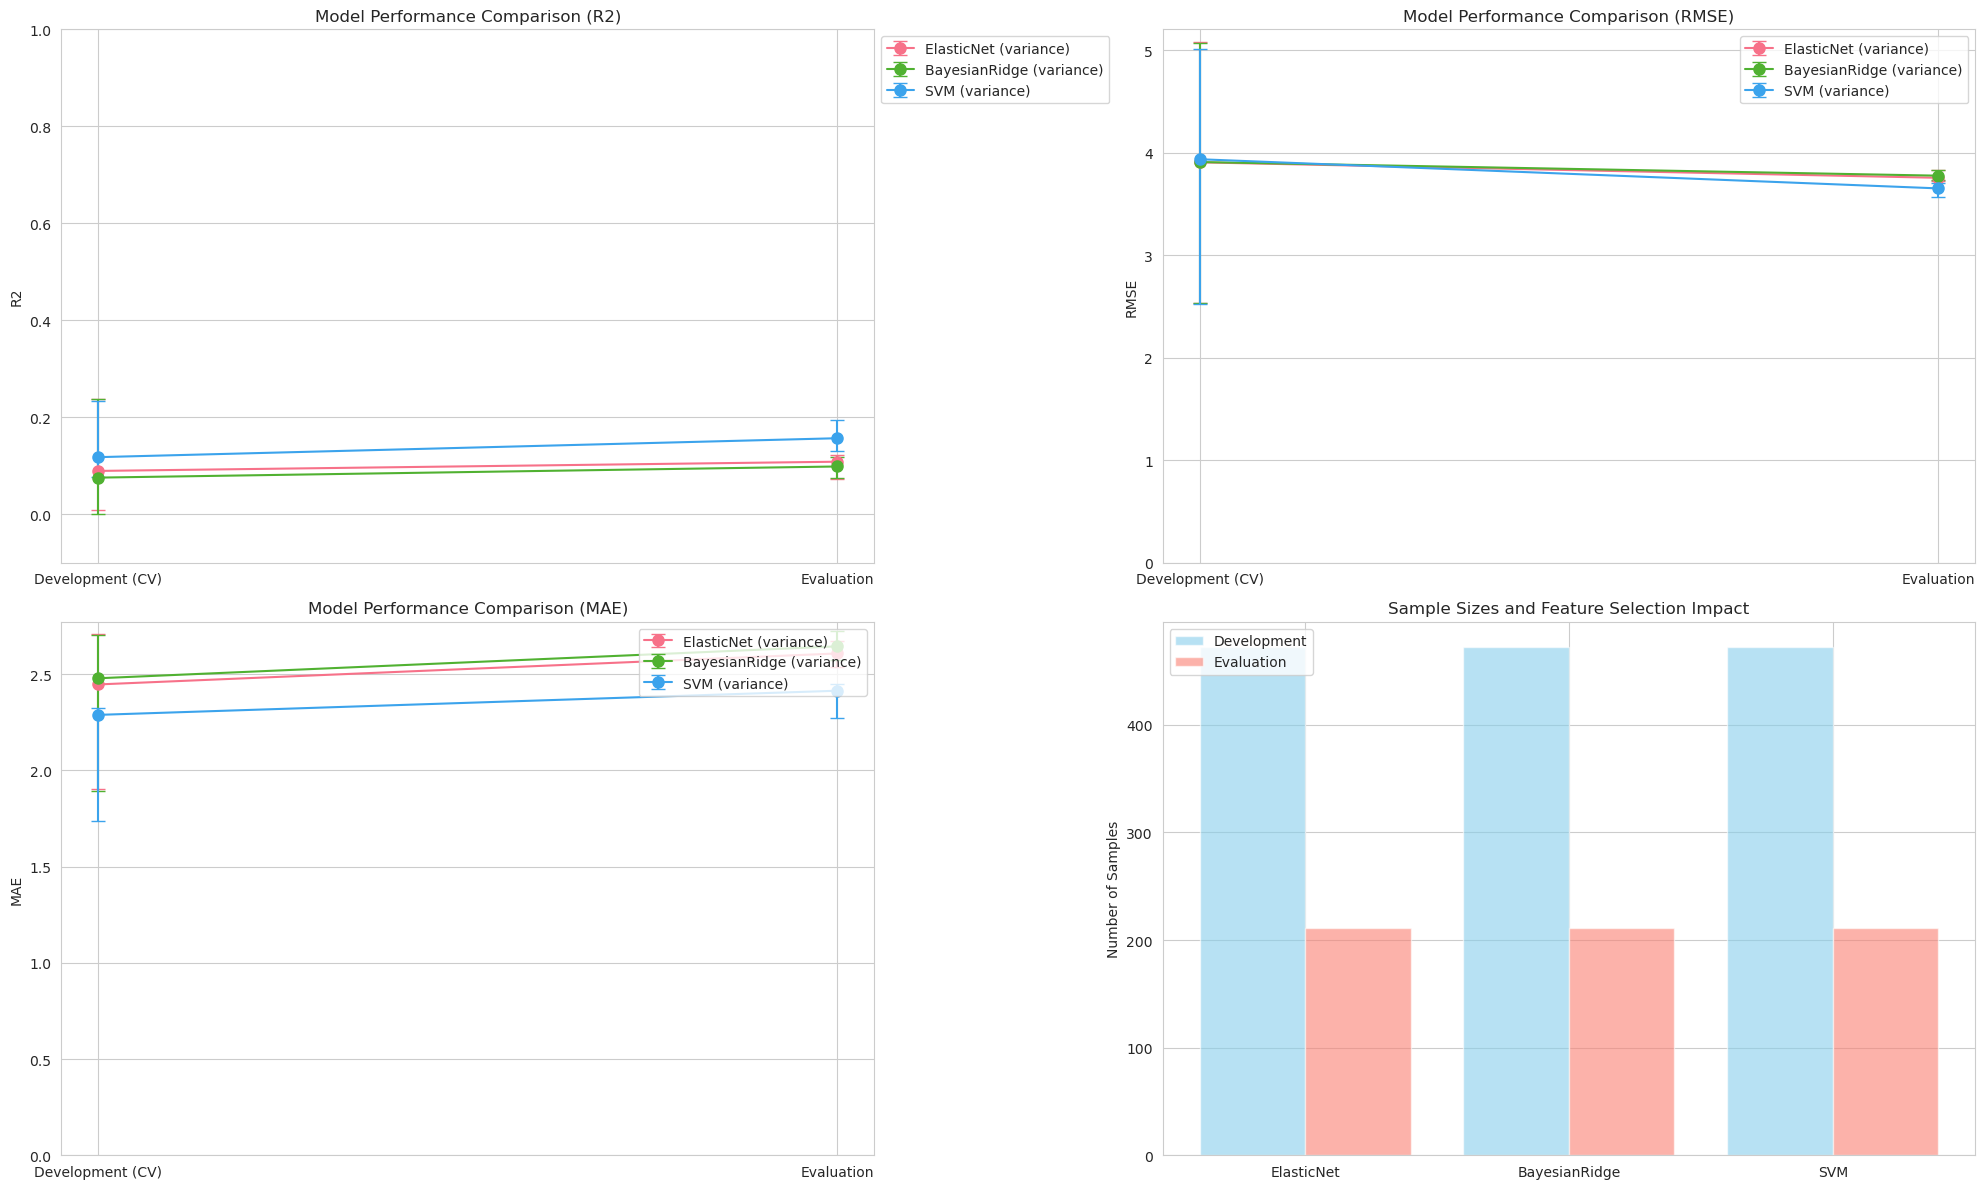


=== Detailed Performance Metrics ===

R2 Scores (median with 95% CI):


,Model,Feature_Selection,Dev_R2,Eval_R2
0,ElasticNet,variance,0.089 (0.009-0.239),0.108 (0.072-0.122)
1,BayesianRidge,variance,0.076 (0.001-0.238),0.099 (0.074-0.119)
2,SVM,variance,0.118 (0.077-0.233),0.157 (0.131-0.194)



RMSE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_RMSE,Eval_RMSE
0,ElasticNet,variance,3.907 (2.536-5.077),3.756 (3.728-3.831)
1,BayesianRidge,variance,3.910 (2.536-5.072),3.777 (3.734-3.828)
2,SVM,variance,3.937 (2.524-5.012),3.653 (3.571-3.708)



MAE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_MAE,Eval_MAE
0,ElasticNet,variance,2.446 (1.906-2.709),2.607 (2.536-2.672)
1,BayesianRidge,variance,2.479 (1.894-2.703),2.644 (2.575-2.722)
2,SVM,variance,2.288 (1.738-2.322),2.414 (2.273-2.451)


In [41]:
plot_model_results_final(results_tuned)

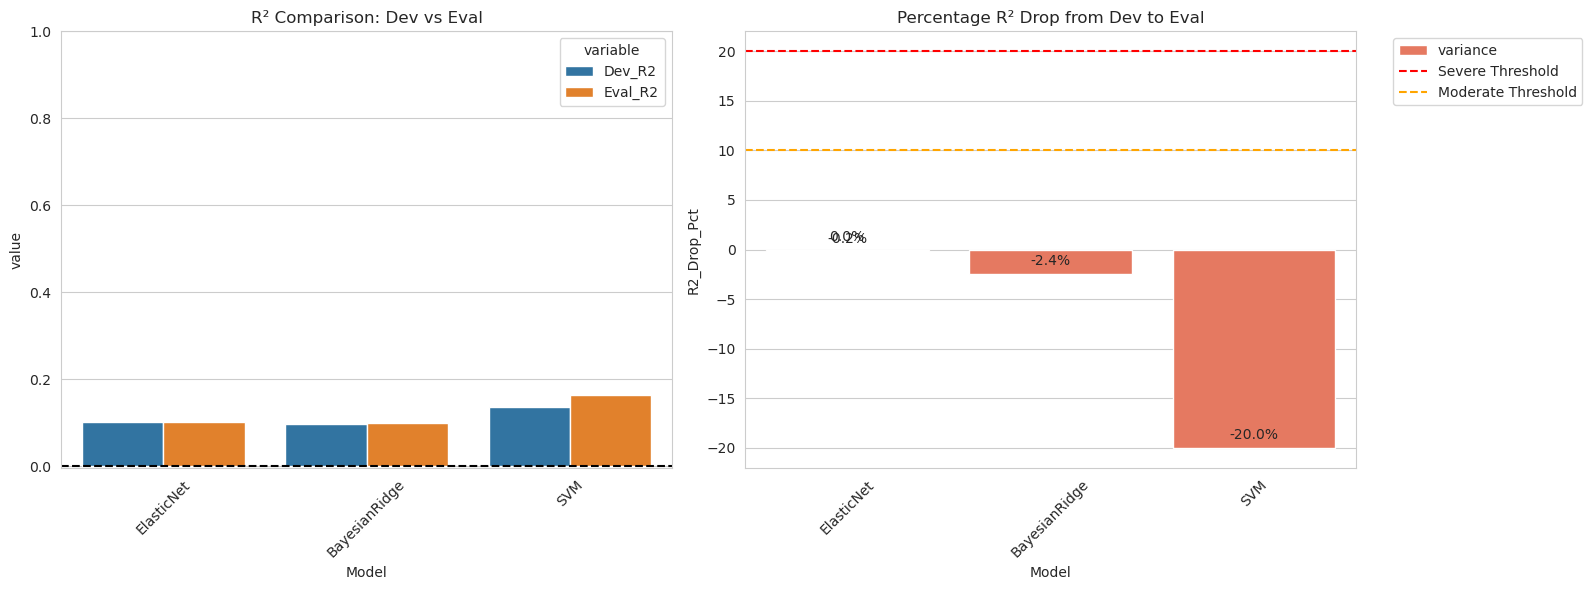

Overfitting status: none
Failed checks: []


,Model,Feature_Selection,Dev_R2,Eval_R2,R2_Drop_Pct,Dev_RMSE,Eval_RMSE,RMSE_Increase_Pct,Dev_Eval_Ratio,Overfitting_Risk
0,ElasticNet,variance,0.102226,0.102380,-0.151152,3.877863,3.768488,-2.820500,0.998491,Low
1,BayesianRidge,variance,0.096223,0.098552,-2.419965,3.890648,3.776556,-2.932464,0.976372,Low
2,SVM,variance,0.135527,0.162648,-20.011789,3.808001,3.639548,-4.423656,0.833251,Low


In [37]:
# Initialize analyzer with threshold
analyzer = OverfittingAnalyzer(threshold=0.2)

# Perform complete analysis with visualization
results = analyzer.analyze(results_tuned, plot=True)

# Access analysis components
print("Overfitting status:", results['overfitting_status'])
print("Failed checks:", results['failed_checks'])
display(results['metrics'].style.background_gradient(
    subset=['R2_Drop_Pct', 'RMSE_Increase_Pct'], 
    cmap='Reds'
))

### Inference on unseen data with the best saved model

In [25]:
def evaluate_new_dataset(model_path, new_data_path, target_col='BMI', age_col='Host age', cols_drop=None):
    """
    Evaluate a totally new and unseen dataset on the saved best-performing model.

    Parameters:
    - model_path: Path to the saved best-performing model (joblib file).
    - new_data_path: Path to the new dataset (CSV file).
    - target_col: Name of the target variable column.
    - age_col: Name of the age column.
    - cols_drop: List of columns to drop during data cleaning (optional).

    Returns:
    - metrics: Dictionary containing evaluation metrics (R2, MAE, RMSE).
    - predictions: Array of predicted values.
    """
    # Load the saved model
    best_model = joblib.load(model_path)
    
    # Clean and preprocess the new dataset
    new_data = data_clean(new_data_path, cols_drop=cols_drop)
    X_new = new_data.drop(columns=[target_col]).values
    y_new = new_data[target_col].values

    # Make predictions
    y_pred = best_model.predict(X_new)

    # Calculate evaluation metrics
    metrics = {
        'r2': r2_score(y_new, y_pred),
        'mae': mean_absolute_error(y_new, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_new, y_pred)),
        'n_samples': len(y_new)
    }

    return metrics, y_pred

In [27]:
COLUMNS_TO_DROP = ['Unnamed: 0', 'Project ID', 'Experiment type', 'Disease MESH ID', 'Sex']

# Path to the saved best-performing model
model_path = '../models/winner_SVM_20250409_232643.joblib'

# Path to the new unseen dataset
new_data_path = '../data/assignment1_dev_set.csv'

# Evaluate the new dataset
metrics, predictions = evaluate_new_dataset(model_path, new_data_path, cols_drop=COLUMNS_TO_DROP)

# Print the evaluation metrics
print("Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


No NA values found.
Evaluation Metrics:
r2: 0.2466
mae: 1.7699
rmse: 3.6486
n_samples: 489.0000
